In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wfdb import processing
from scipy import signal

In [2]:
data = pd.read_csv("X_train.csv")
answers = pd.read_csv("y_train.csv")

In [3]:
data = (pd.merge(data ,answers, on = "Unnamed: 0"))
data['age'] = (data['age'] - data['age'].mean(axis = 0))/data['age'].std(axis = 0)

In [4]:
data = data.drop( ["Unnamed: 0"], axis = 1)

In [5]:
data.head()

,age,gender,i_0,i_1,i_2,i_3,i_4,i_5,i_6,i_7,...,v6_4991,v6_4992,v6_4993,v6_4994,v6_4995,v6_4996,v6_4997,v6_4998,v6_4999,axis_id
0,0.192357,1,-59.0,-58.0,-58.0,-58.0,-58.0,-58.0,-58.0,-58.0,...,114.0,119.0,124.0,129.0,134.0,147.0,172.0,200.0,143.0,3
1,1.399105,0,-39.0,-38.0,-38.0,-38.0,-38.0,-38.0,-38.0,-38.0,...,229.0,259.0,289.0,319.0,349.0,379.0,409.0,439.0,302.0,3
2,0.137505,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-58.0,-58.0,-58.0,-58.0,-58.0,-58.0,-38.0,-11.0,-2.0,2
3,1.344253,0,108.0,106.0,93.0,79.0,86.0,74.0,64.0,51.0,...,81.0,89.0,79.0,59.0,61.0,64.0,49.0,26.0,10.0,3
4,-1.453208,1,363.0,366.0,366.0,353.0,334.0,314.0,306.0,294.0,...,-61.0,-59.0,-86.0,-66.0,-71.0,-91.0,-84.0,-11.0,-4.0,0


In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [7]:
data_as_matrix = data.values

In [8]:
data_as_matrix.shape

(659, 60003)

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
signal_data = []
for ind, line in enumerate (data_as_matrix, 0):
    r_peaks = []
    for i in range(2, 55003, 5000):
        signal = line[i : i+5000]
        xqrs = processing.XQRS(sig=signal, fs=500)
        xqrs.detect(verbose = False)
        r_peaks.append(xqrs.qrs_inds)
    signal_data.append(r_peaks)
    if (ind % 20 == 0):
        print(str(ind)+"/659")

0/659
20/659
40/659
60/659
80/659
100/659
120/659
140/659
160/659
180/659
200/659
220/659
240/659
260/659
280/659
300/659
320/659
340/659
360/659
380/659
400/659
420/659
440/659
460/659
480/659
500/659
520/659
540/659
560/659
580/659
600/659
620/659
640/659


In [49]:
signal_data[0]

[array([ 196,  466,  744, 1066, 1384, 1645, 1943, 2170, 2499, 2771, 2976,
        3207, 3495, 3759, 4069, 4430, 4868]),
 array([ 124,  288,  467,  745, 1067, 1384, 1645, 1944, 2170, 2500, 2772,
        2977, 3209, 3497, 3760, 4069, 4431, 4869]),
 array([ 138,  287,  450,  761, 1083, 1400, 1661, 1960, 2197, 2517, 2787,
        2992, 3225, 3512, 3775, 4085, 4413, 4885]),
 array([ 196,  466,  745, 1067, 1384, 1645, 1944, 2170, 2500, 2771, 2976,
        3208, 3496, 3760, 4069, 4430, 4868]),
 array([ 195,  465,  743, 1064, 1382, 1644, 1942, 2170, 2499, 2770, 2975,
        3206, 3494, 3758, 4068, 4429, 4867]),
 array([ 124,  288,  481,  760, 1082, 1399, 1659, 1945, 2184, 2501, 2786,
        2978, 3223, 3498, 3761, 4070, 4432, 4870]),
 array([ 201,  472,  750, 1072, 1389, 1650, 1949, 2176, 2505, 2776, 2982,
        3213, 3501, 3765, 4074, 4436, 4874]),
 array([ 193,  463,  741, 1063, 1381, 1642, 1941, 2167, 2497, 2779, 2973,
        3204, 3492, 3756, 4066, 4428, 4865]),
 array([ 194,  464,  7

In [126]:
signal_df = pd.DataFrame(data = signal_data,
                   columns=["i", "ii", "iii", "avr", "avl", "avf", "v1", "v2", "v3", "v4", "v5", "v6" ])

In [66]:
additional_info = pd.DataFrame()

In [67]:
additional_info["length"]  = signal_df.apply(lambda row: [len(x) for x in row], axis = 1)

In [69]:
additional_info["l_mean"] =  additional_info["length"].apply(lambda x: np.mean(x))

In [71]:
additional_info["l_std"] =  additional_info["length"].apply(lambda x: np.std(x))

In [72]:
additional_info["first_std"]  = signal_df.apply(lambda row: np.std([x[0] for x in row]), axis = 1)

In [73]:
additional_info["last_std"]  = signal_df.apply(lambda row: np.std([x[len(x) - 1] for x in row]), axis = 1)

In [77]:
additional_info = additional_info.drop(["length"], axis=1)

In [78]:
additional_info.head()

,l_mean,l_std,first_std,last_std
0,17.333333,0.471405,33.479679,5.155903
1,16.333333,0.623610,21.441134,82.533285
2,9.583333,0.493007,46.503509,3.377828
3,9.000000,0.000000,30.633474,2.812423
4,14.833333,0.372678,41.108512,4.572715


In [81]:
signal_df.values[0]

array([array([ 196,  466,  744, 1066, 1384, 1645, 1943, 2170, 2499, 2771, 2976,
       3207, 3495, 3759, 4069, 4430, 4868]),
       array([ 124,  288,  467,  745, 1067, 1384, 1645, 1944, 2170, 2500, 2772,
       2977, 3209, 3497, 3760, 4069, 4431, 4869]),
       array([ 138,  287,  450,  761, 1083, 1400, 1661, 1960, 2197, 2517, 2787,
       2992, 3225, 3512, 3775, 4085, 4413, 4885]),
       array([ 196,  466,  745, 1067, 1384, 1645, 1944, 2170, 2500, 2771, 2976,
       3208, 3496, 3760, 4069, 4430, 4868]),
       array([ 195,  465,  743, 1064, 1382, 1644, 1942, 2170, 2499, 2770, 2975,
       3206, 3494, 3758, 4068, 4429, 4867]),
       array([ 124,  288,  481,  760, 1082, 1399, 1659, 1945, 2184, 2501, 2786,
       2978, 3223, 3498, 3761, 4070, 4432, 4870]),
       array([ 201,  472,  750, 1072, 1389, 1650, 1949, 2176, 2505, 2776, 2982,
       3213, 3501, 3765, 4074, 4436, 4874]),
       array([ 193,  463,  741, 1063, 1381, 1642, 1941, 2167, 2497, 2779, 2973,
       3204, 3492, 3756, 40

In [79]:
additional_info.describe()

,l_mean,l_std,first_std,last_std
count,659.000000,659.000000,659.000000,659.000000
mean,12.610774,0.460386,26.283263,34.492094
std,2.468694,0.544618,15.637898,74.117351
min,7.666667,0.000000,1.320248,1.037492
25%,11.000000,0.000000,15.399754,3.341656
50%,12.083333,0.433013,25.306318,4.472136
75%,13.916667,0.552771,36.296952,38.220265
max,24.000000,5.090159,83.555496,1248.831977


In [47]:
signals = [data.values[0,x:x+5000] for x in range(2, 55003, 5000)]

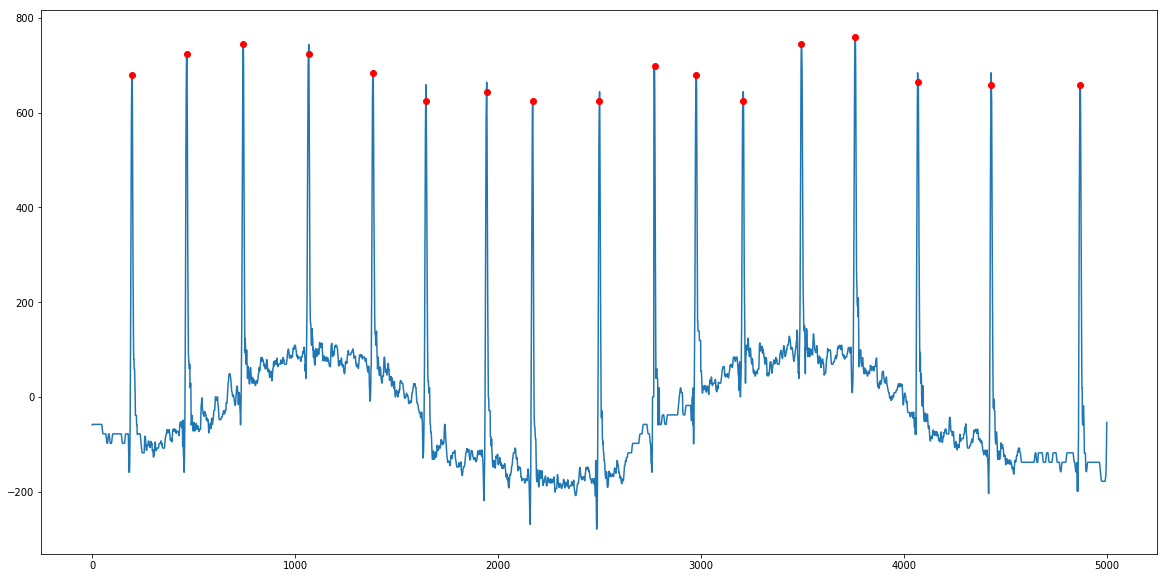

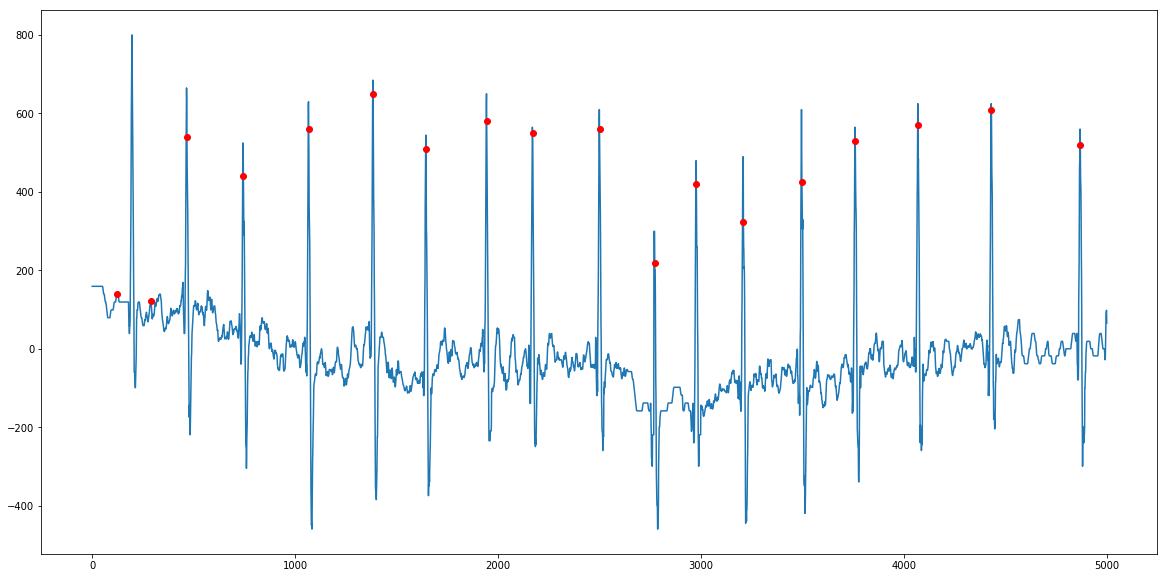

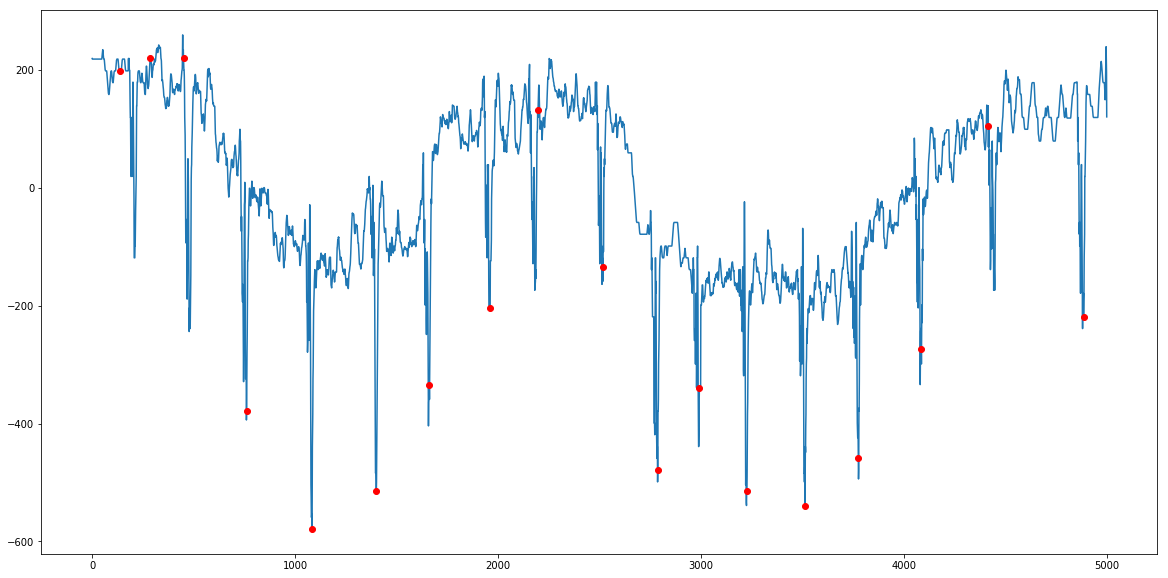

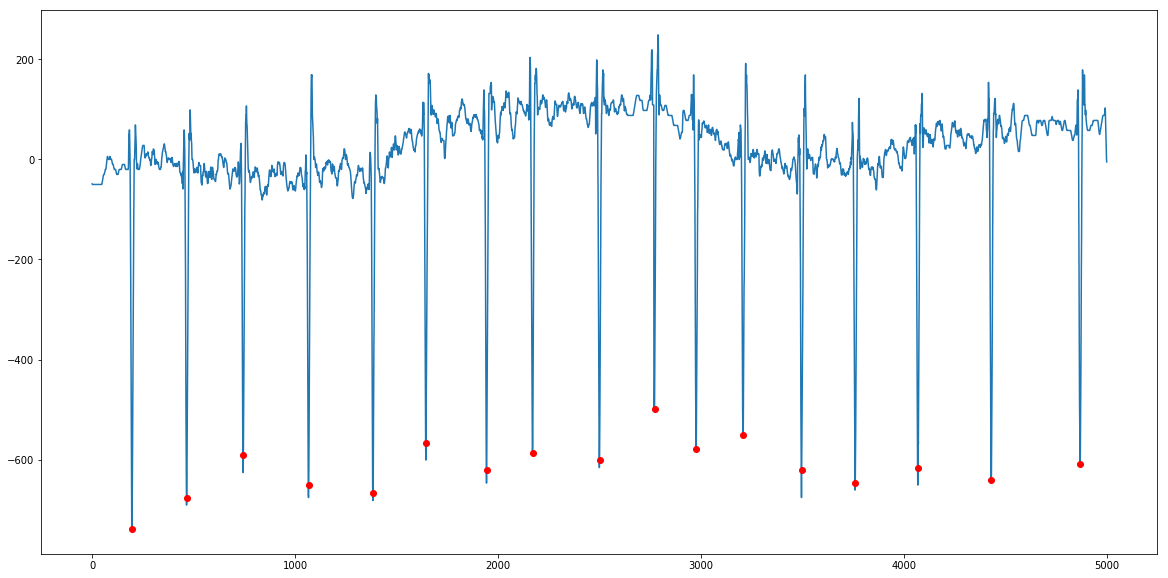

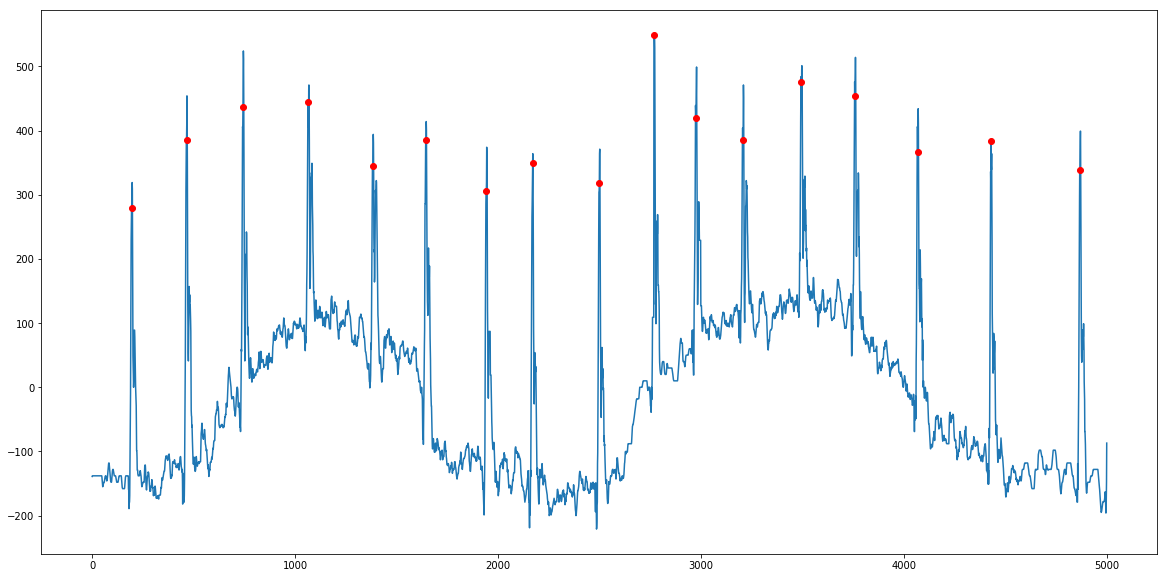

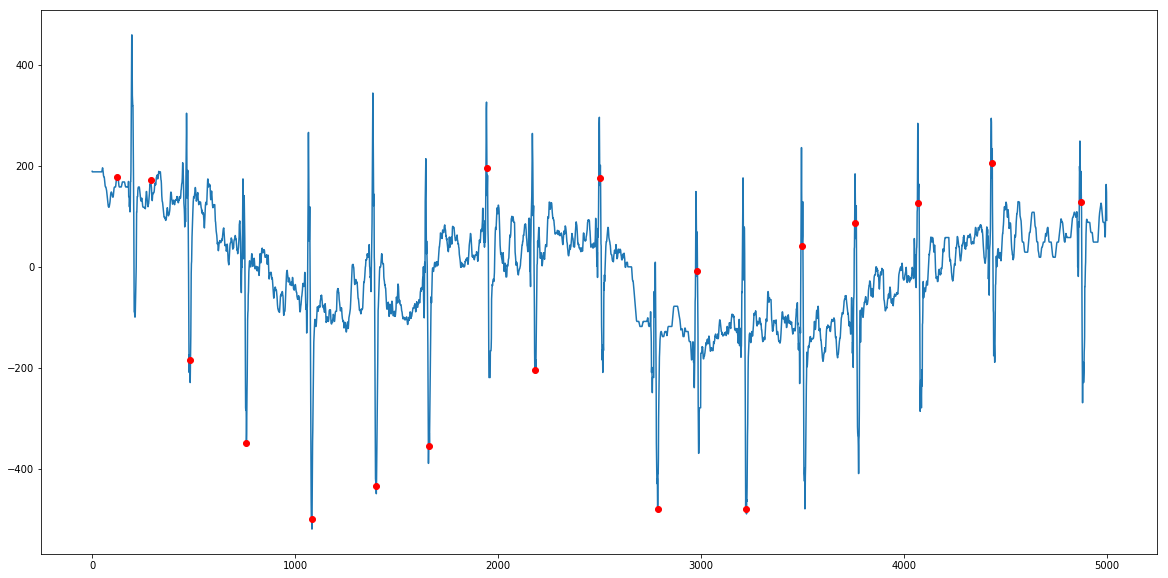

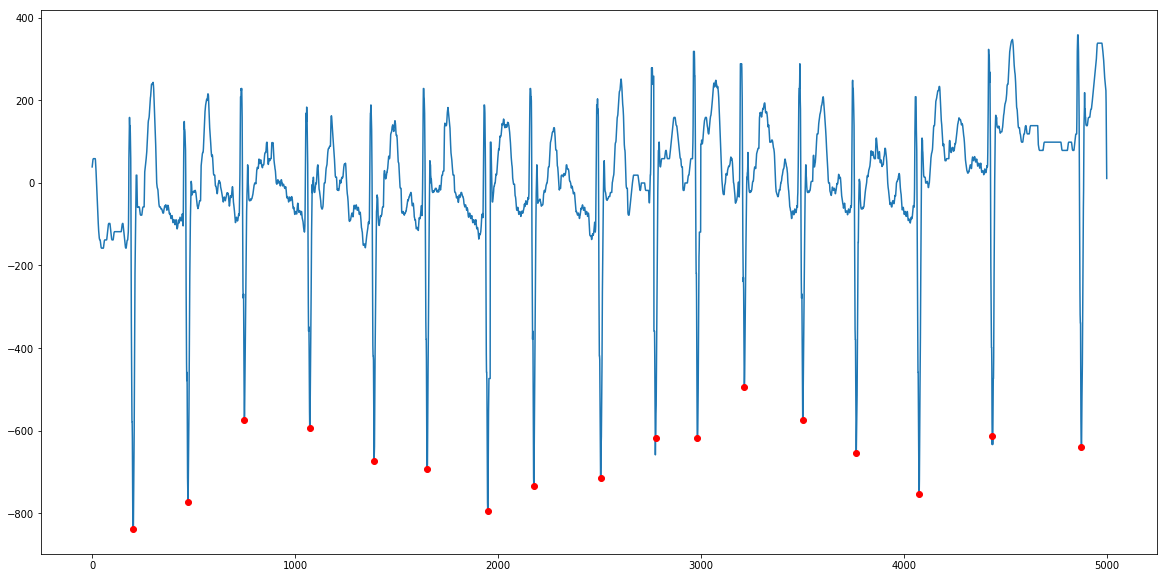

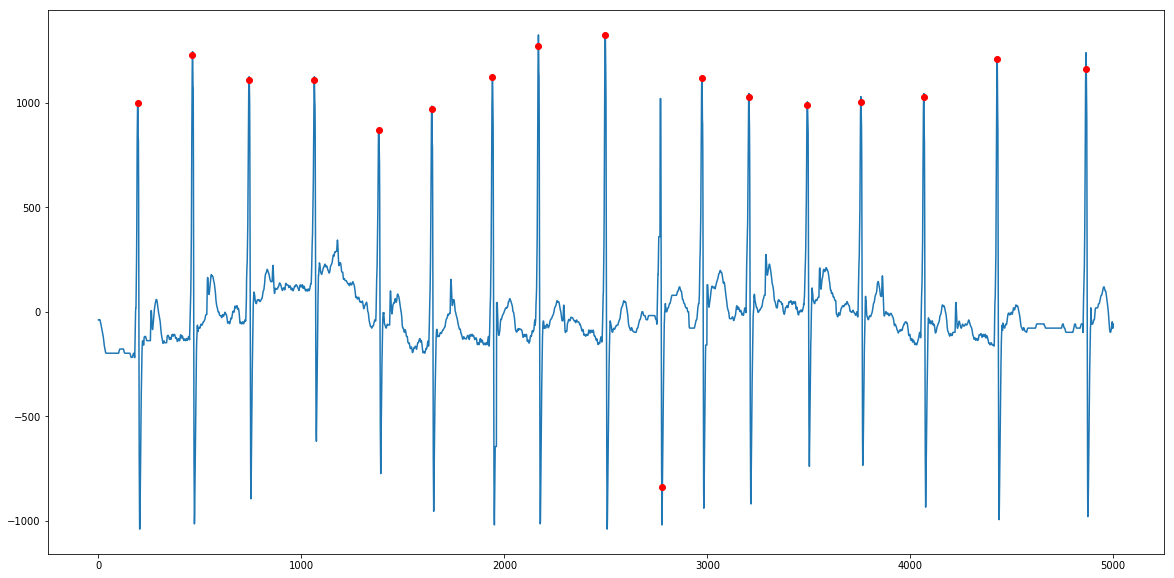

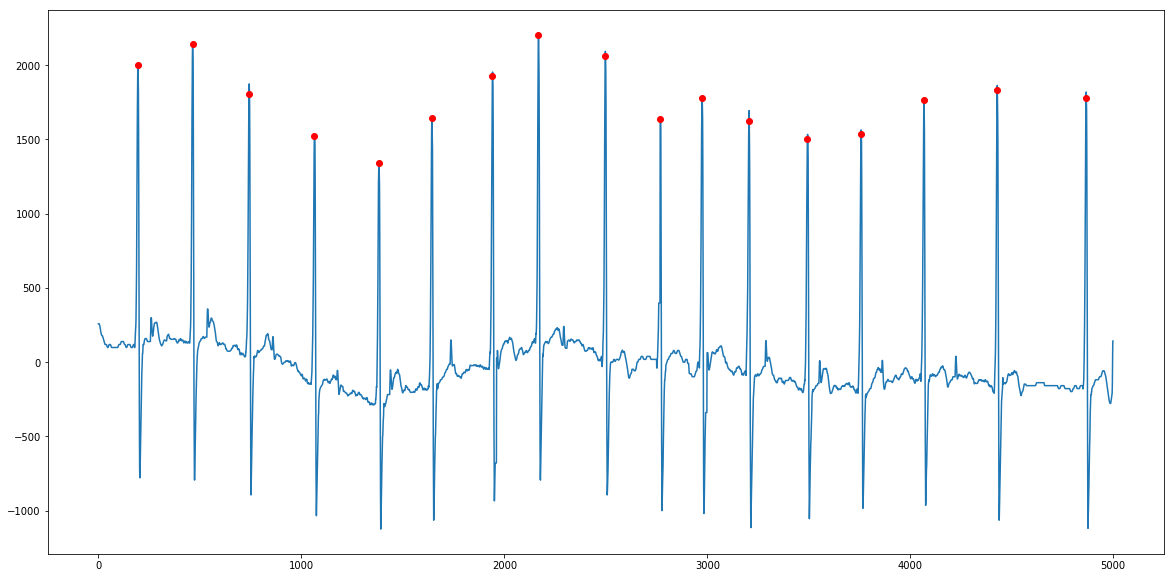

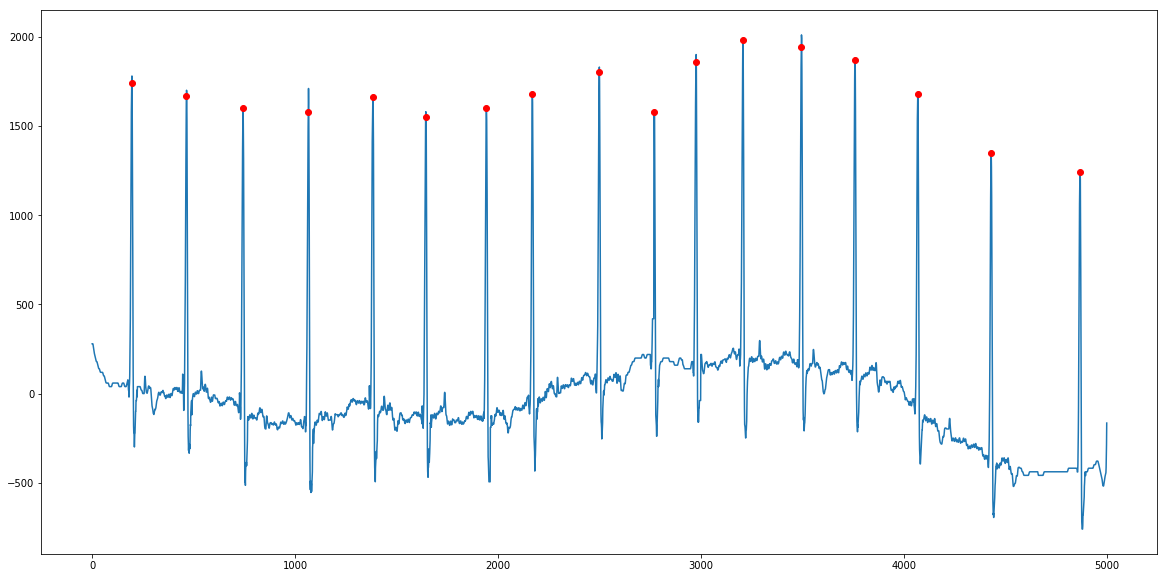

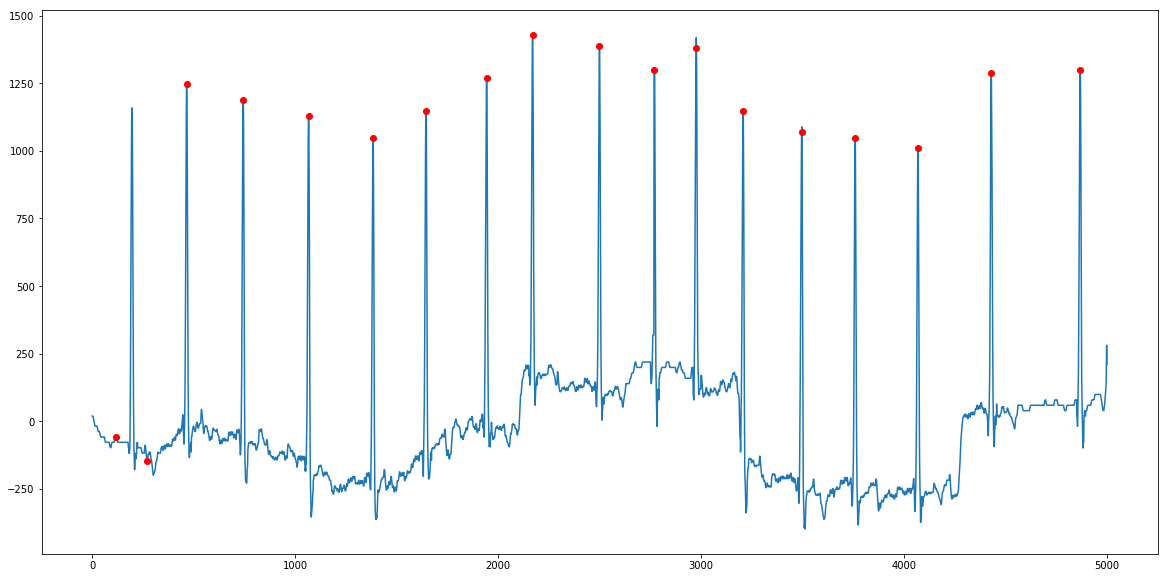

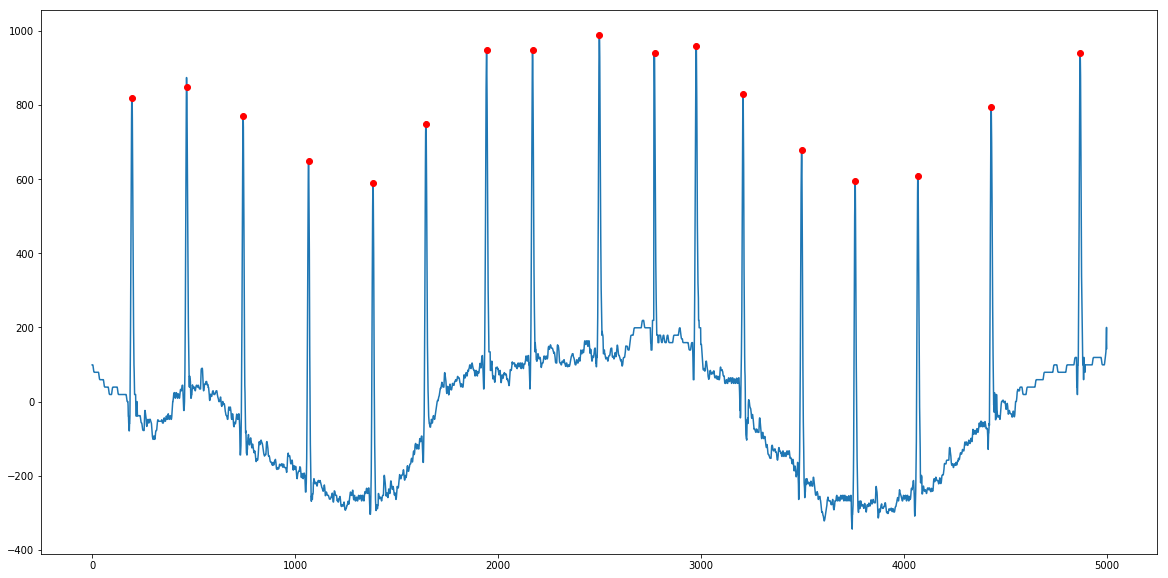

In [48]:
for i in range(12):
    plt.plot(signals[i])
    plt.plot(signal_data[0][i], signals[i][signal_data[0][i]], 'ro')
    plt.show()

In [128]:
signal_df.to_csv("signal_data.csv", sep="#",  index=False)

In [10]:
signal_df = pd.read_csv("signal_data.csv", sep="#", index_col=False)

In [11]:
np.fromstring(signal_df.iloc[0]["iii"][1:-1], sep="  ", dtype=np.uint64)

array([ 138,  287,  450,  761, 1083, 1400, 1661, 1960, 2197, 2517, 2787,
       2992, 3225, 3512, 3775, 4085, 4413, 4885], dtype=uint64)

In [12]:
for column in signal_df.columns:
    signal_df[column] = signal_df[column].apply(lambda row: np.fromstring(row[1:-1], sep="  ", dtype=np.uint64))

In [13]:
signal_df.head()

,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,v5,v6
0,"[196, 466, 744, 1066, 1384, 1645, 1943, 2170, ...","[124, 288, 467, 745, 1067, 1384, 1645, 1944, 2...","[138, 287, 450, 761, 1083, 1400, 1661, 1960, 2...","[196, 466, 745, 1067, 1384, 1645, 1944, 2170, ...","[195, 465, 743, 1064, 1382, 1644, 1942, 2170, ...","[124, 288, 481, 760, 1082, 1399, 1659, 1945, 2...","[201, 472, 750, 1072, 1389, 1650, 1949, 2176, ...","[193, 463, 741, 1063, 1381, 1642, 1941, 2167, ...","[194, 464, 742, 1064, 1382, 1643, 1941, 2168, ...","[195, 464, 743, 1065, 1383, 1643, 1942, 2169, ...","[116, 271, 465, 743, 1066, 1383, 1644, 1943, 2...","[196, 466, 744, 1066, 1384, 1645, 1943, 2170, ..."
1,"[172, 469, 686, 1045, 1408, 1760, 2009, 2208, ...","[174, 469, 685, 1045, 1408, 1760, 2000, 2199, ...","[173, 469, 690, 1046, 1409, 1761, 2010, 2210, ...","[228, 469, 685, 1045, 1408, 1760, 2007, 2205, ...","[173, 469, 687, 1046, 1409, 1760, 2009, 2209, ...","[173, 469, 684, 1044, 1405, 1759, 2010, 2198, ...","[225, 461, 678, 1046, 1410, 1763, 2003, 2200, ...","[170, 467, 683, 1039, 1415, 1767, 2008, 2195, ...","[174, 469, 673, 1041, 1403, 1768, 2010, 2209, ...","[166, 454, 672, 1043, 1405, 1757, 1995, 2196, ...","[171, 457, 675, 1044, 1406, 1758, 2000, 2198, ...","[157, 455, 673, 1045, 1408, 1760, 1996, 2197, ..."
2,"[122, 236, 343, 951, 1557, 2176, 2782, 3385, 3...","[114, 238, 347, 954, 1561, 2180, 2786, 3389, 3...","[118, 350, 957, 1563, 2182, 2788, 3392, 3993, ...","[124, 237, 346, 953, 1559, 2179, 2784, 3388, 3...","[120, 339, 947, 1553, 2172, 2778, 3382, 3983, ...","[115, 239, 348, 955, 1562, 2181, 2787, 3391, 3...","[109, 254, 661, 956, 1562, 2181, 2787, 3391, 3...","[192, 350, 957, 1563, 2183, 2788, 3392, 3993, ...","[108, 259, 531, 946, 1552, 2171, 2777, 3381, 3...","[192, 345, 952, 1558, 2178, 2783, 3387, 3988, ...","[264, 474, 953, 1559, 2179, 2784, 3388, 3989, ...","[119, 265, 445, 954, 1560, 2179, 2785, 3389, 3..."
3,"[112, 580, 1129, 1684, 2239, 2789, 3356, 3914,...","[111, 578, 1128, 1683, 2237, 2788, 3354, 3912,...","[124, 582, 1130, 1686, 2240, 2791, 3358, 3916,...","[112, 580, 1129, 1684, 2238, 2789, 3355, 3913,...","[112, 581, 1129, 1685, 2239, 2790, 3357, 3915,...","[154, 574, 1126, 1679, 2232, 2784, 3350, 3907,...","[182, 587, 1137, 1691, 2245, 2796, 3363, 3921,...","[179, 577, 1126, 1681, 2235, 2786, 3352, 3910,...","[180, 577, 1126, 1681, 2235, 2786, 3353, 3911,...","[183, 577, 1126, 1681, 2235, 2786, 3352, 3910,...","[111, 578, 1127, 1682, 2236, 2787, 3354, 3911,...","[151, 580, 1129, 1684, 2238, 2789, 3355, 3913,..."
4,"[184, 331, 600, 952, 1294, 1640, 1990, 2345, 2...","[146, 248, 604, 957, 1299, 1645, 1995, 2350, 2...","[116, 254, 610, 962, 1304, 1651, 2000, 2355, 2...","[246, 601, 953, 1296, 1642, 1992, 2347, 2708, ...","[116, 256, 598, 950, 1293, 1652, 2001, 2357, 2...","[146, 252, 608, 960, 1302, 1648, 1998, 2353, 2...","[165, 325, 596, 948, 1292, 1637, 1987, 2342, 2...","[242, 597, 950, 1292, 1638, 1987, 2343, 2703, ...","[169, 361, 599, 951, 1294, 1640, 1989, 2344, 2...","[131, 245, 601, 953, 1295, 1641, 1991, 2346, 2...","[144, 246, 601, 953, 1296, 1642, 1992, 2347, 2...","[146, 247, 603, 955, 1297, 1643, 1993, 2348, 2..."


In [32]:
def bandpass(data, fs, fc_low=5, fc_high=20):
        """
        Apply a bandpass filter onto the signal, and save the filtered
        signal.
        """
    

        b, a = signal.butter(2, [float(fc_low) * 2 / fs,
                                 float(fc_high) * 2 / fs], 'pass')
        return signal.filtfilt(b, a, data,
                                     axis=0)

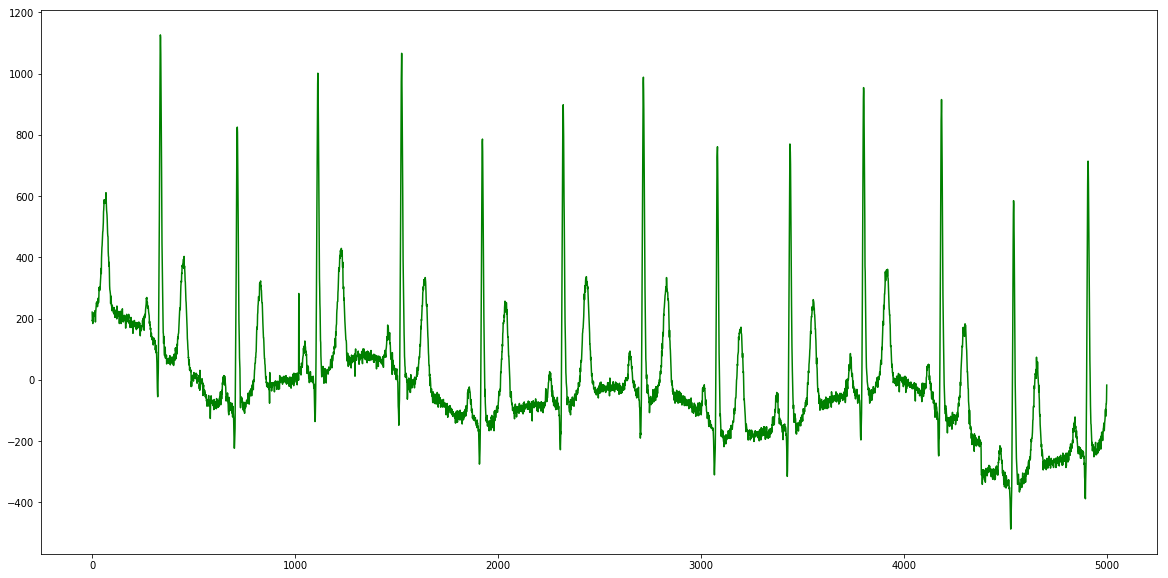

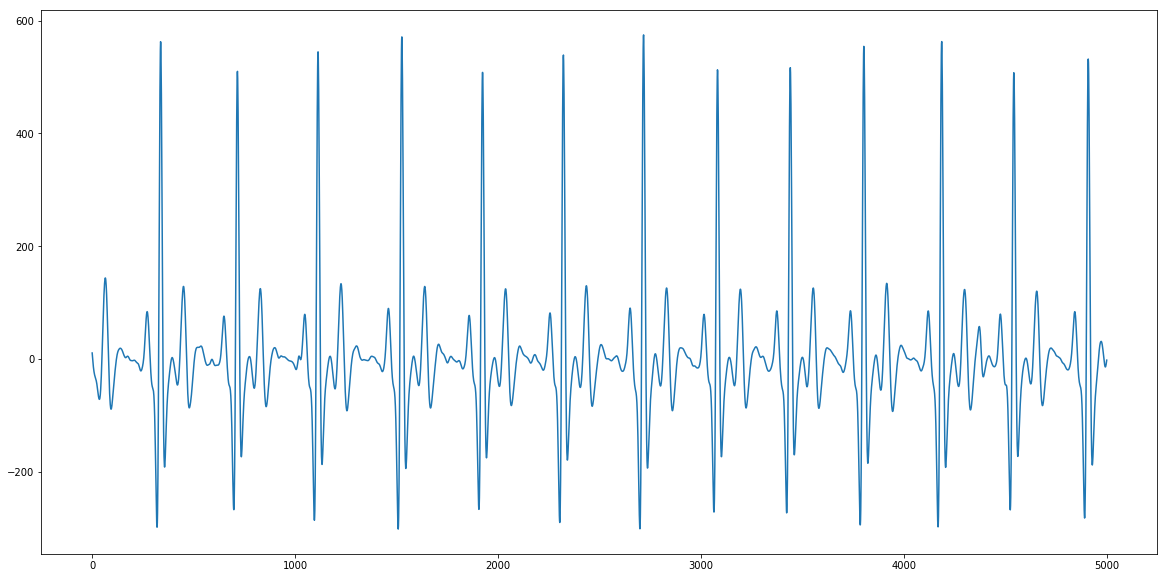

In [43]:
plt.plot(data.values[60][2:5002], 'g')
plt.show()
plt.plot(bandpass(data.values[60][2:5002], 500))

In [64]:
from torch.utils.data import Dataset, DataLoader

In [131]:
class FilteredDataset(Dataset):
    def __init__(self, data, low_cut = 5, high_cut = 20):
        
        self.data = data.values
        self.no_classes = 4
        self.low_cut = low_cut
        self.high_cut = high_cut
        self._filter_signal()
        
    def _apply_bandpass(self, row):
        return [bandpass(row[i : i + 5000], 500, self.low_cut, self.high_cut) for i in range(2, 55003, 5000)]
        
    def _filter_signal(self):
        self.filtered_data = np.apply_along_axis(lambda x: self._apply_bandpass(x),1, self.data)

    def __len__(self):
        """
        Denotes the total number of samples.
        """
        return len(self.filtered_data)
    
    def _get_label(self, idx):
        label = np.zeros((self.no_classes), dtype=np.float32)
        label[int(self.data[idx][-1])] = 1
        return label

    def __getitem__(self, idx):
        """
        Generates one sample of data.
        """
        
        return self.filtered_data[idx], self._get_label(idx)

In [132]:
dataset = FilteredDataset(data)

In [133]:
train_loader = DataLoader(
    dataset, batch_size=32
)

torch.Size([32, 12, 5000])


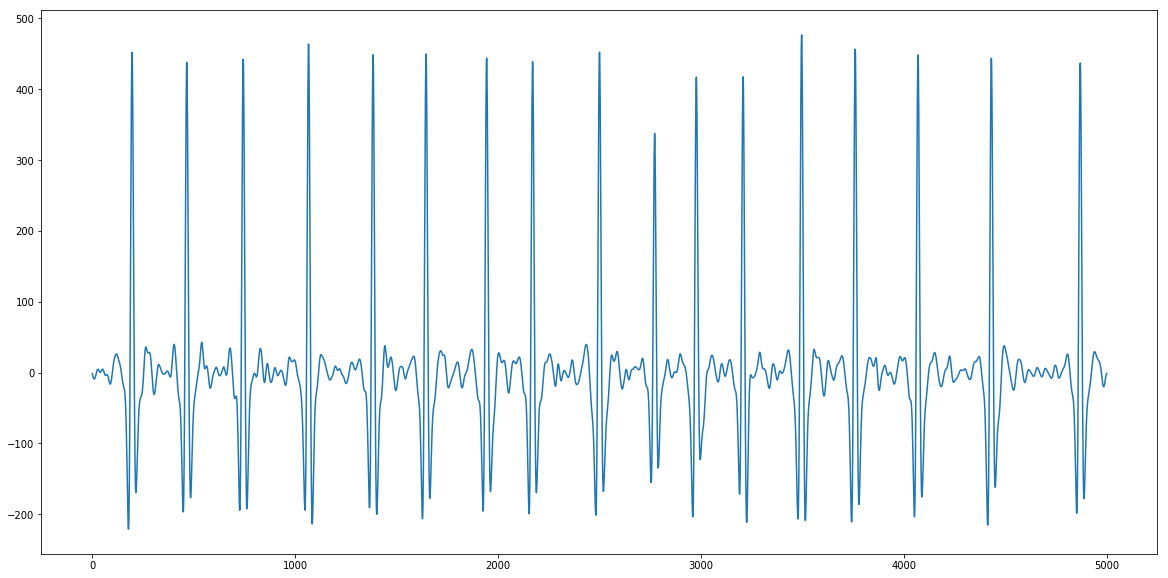

In [136]:
for i in train_loader:
    print(i[0].shape)
    plt.plot(i[0][0].numpy()[-1])
    break

In [231]:
class FixedLengthDataset(FilteredDataset):
    def __init__(self, data, peaks, signal_length, min_start_offset = 50, max_start_offset = 300, low_cut = 5, high_cut = 20):
        super().__init__(data, low_cut, high_cut)
        self.peaks = peaks.values
        self.signal_length = signal_length
        self.min_start_offset = min_start_offset
        self.max_start_offset = max_start_offset
        self._get_cuts()
        
    def _get_peaks_for_signal_cuts(self, peaks):
        try:
            filtered_peaks = [
                peak for peak in peaks 
                if peak < 5000 - self.signal_length or 5000 - self.signal_length > max(0, peak - self.max_start_offset) 
                             ]
            return filtered_peaks
        except:
            print("Exception: ", peaks)
            return []

    def _get_cuts(self):
        cut_points = []
        for i, peaks in enumerate(self.peaks):
            filtered_peaks =  self._get_peaks_for_signal_cuts(peaks[0]) # only for first (i) led
            for point in filtered_peaks:
                cut_points.append([i, point])
        self.cut_points = cut_points
        
    def _cut(self, rows, cut_point):
        start_offset =  cut_point - np.random.randint(self.min_start_offset, self.max_start_offset+1)
        start_offset = min(start_offset, 5000 - self.signal_length)
        start_offset = int(max(0, start_offset))
        end_offset = start_offset + self.signal_length
        try:
            cut_rows = [row[start_offset:end_offset] for row in rows]
            print(cut_point, start_offset, end_offset)
            return np.array(cut_rows)
        except:
            print ("Cut Exception:")
            print(rows)
            print(cut_point, start_offset, end_offset)
        
    def __len__(self):
        """
        Denotes the total number of samples.
        """
        return len(self.cut_points)

    def __getitem__(self, idx):
        """
        Generates one sample of data.
        """
        true_idx, cut_point = self.cut_points[idx]
        label = self._get_label(true_idx)
        cut_rows = self._cut(self.filtered_data[true_idx], cut_point)
        
        return cut_rows, label

In [232]:
fldataset = FixedLengthDataset(data, signal_df, 3000)

In [233]:
fl_loader = DataLoader(
    fldataset, batch_size=1
)

In [235]:
for i in fl_loader:
    print(i[0].shape)

196 66 3066
torch.Size([1, 12, 3000])
466 236 3236
torch.Size([1, 12, 3000])
744 576 3576
torch.Size([1, 12, 3000])
1066 837 3837
torch.Size([1, 12, 3000])
1384 1088 4088
torch.Size([1, 12, 3000])
1645 1566 4566
torch.Size([1, 12, 3000])
1943 1869 4869
torch.Size([1, 12, 3000])
2170 2000 5000
torch.Size([1, 12, 3000])
172 0 3000
torch.Size([1, 12, 3000])
469 416 3416
torch.Size([1, 12, 3000])
686 450 3450
torch.Size([1, 12, 3000])
1045 965 3965
torch.Size([1, 12, 3000])
1408 1185 4185
torch.Size([1, 12, 3000])
1760 1618 4618
torch.Size([1, 12, 3000])
2009 1861 4861
torch.Size([1, 12, 3000])
2208 2000 5000
torch.Size([1, 12, 3000])
122 0 3000
torch.Size([1, 12, 3000])
236 0 3000
torch.Size([1, 12, 3000])
343 146 3146
torch.Size([1, 12, 3000])
951 815 3815
torch.Size([1, 12, 3000])
1557 1485 4485
torch.Size([1, 12, 3000])
2176 1980 4980
torch.Size([1, 12, 3000])
112 37 3037
torch.Size([1, 12, 3000])
580 425 3425
torch.Size([1, 12, 3000])
1129 934 3934
torch.Size([1, 12, 3000])
1684 1412 

torch.Size([1, 12, 3000])
324 191 3191
torch.Size([1, 12, 3000])
725 610 3610
torch.Size([1, 12, 3000])
1122 983 3983
torch.Size([1, 12, 3000])
1507 1282 4282
torch.Size([1, 12, 3000])
1907 1696 4696
torch.Size([1, 12, 3000])
194 0 3000
torch.Size([1, 12, 3000])
510 434 3434
torch.Size([1, 12, 3000])
826 755 3755
torch.Size([1, 12, 3000])
1142 1066 4066
torch.Size([1, 12, 3000])
1457 1166 4166
torch.Size([1, 12, 3000])
1769 1586 4586
torch.Size([1, 12, 3000])
2079 1788 4788
torch.Size([1, 12, 3000])
121 51 3051
torch.Size([1, 12, 3000])
265 156 3156
torch.Size([1, 12, 3000])
625 409 3409
torch.Size([1, 12, 3000])
982 856 3856
torch.Size([1, 12, 3000])
1335 1228 4228
torch.Size([1, 12, 3000])
1690 1570 4570
torch.Size([1, 12, 3000])
2042 1921 4921
torch.Size([1, 12, 3000])
183 14 3014
torch.Size([1, 12, 3000])
489 286 3286
torch.Size([1, 12, 3000])
913 678 3678
torch.Size([1, 12, 3000])
1344 1062 4062
torch.Size([1, 12, 3000])
1766 1480 4480
torch.Size([1, 12, 3000])
2179 1909 4909
torc

torch.Size([1, 12, 3000])
1077 796 3796
torch.Size([1, 12, 3000])
1666 1465 4465
torch.Size([1, 12, 3000])
2055 1940 4940
torch.Size([1, 12, 3000])
112 0 3000
torch.Size([1, 12, 3000])
280 74 3074
torch.Size([1, 12, 3000])
595 500 3500
torch.Size([1, 12, 3000])
1013 869 3869
torch.Size([1, 12, 3000])
1428 1160 4160
torch.Size([1, 12, 3000])
1838 1609 4609
torch.Size([1, 12, 3000])
2250 1965 4965
torch.Size([1, 12, 3000])
114 0 3000
torch.Size([1, 12, 3000])
300 116 3116
torch.Size([1, 12, 3000])
568 315 3315
torch.Size([1, 12, 3000])
875 744 3744
torch.Size([1, 12, 3000])
1389 1294 4294
torch.Size([1, 12, 3000])
1518 1467 4467
torch.Size([1, 12, 3000])
1907 1651 4651
torch.Size([1, 12, 3000])
2161 1866 4866
torch.Size([1, 12, 3000])
110 2 3002
torch.Size([1, 12, 3000])
348 265 3265
torch.Size([1, 12, 3000])
674 470 3470
torch.Size([1, 12, 3000])
1016 951 3951
torch.Size([1, 12, 3000])
1386 1103 4103
torch.Size([1, 12, 3000])
1725 1512 4512
torch.Size([1, 12, 3000])
2062 1860 4860
torch

126 38 3038
torch.Size([1, 12, 3000])
229 81 3081
torch.Size([1, 12, 3000])
339 120 3120
torch.Size([1, 12, 3000])
661 533 3533
torch.Size([1, 12, 3000])
1030 878 3878
torch.Size([1, 12, 3000])
1402 1271 4271
torch.Size([1, 12, 3000])
1770 1491 4491
torch.Size([1, 12, 3000])
2136 1848 4848
torch.Size([1, 12, 3000])
163 53 3053
torch.Size([1, 12, 3000])
391 233 3233
torch.Size([1, 12, 3000])
627 521 3521
torch.Size([1, 12, 3000])
959 811 3811
torch.Size([1, 12, 3000])
1399 1290 4290
torch.Size([1, 12, 3000])
1859 1629 4629
torch.Size([1, 12, 3000])
2296 2000 5000
torch.Size([1, 12, 3000])
191 0 3000
torch.Size([1, 12, 3000])
667 453 3453
torch.Size([1, 12, 3000])
1134 1009 4009
torch.Size([1, 12, 3000])
1613 1507 4507
torch.Size([1, 12, 3000])
2099 1868 4868
torch.Size([1, 12, 3000])
103 0 3000
torch.Size([1, 12, 3000])
255 183 3183
torch.Size([1, 12, 3000])
437 321 3321
torch.Size([1, 12, 3000])
989 745 3745
torch.Size([1, 12, 3000])
1624 1527 4527
torch.Size([1, 12, 3000])
2251 2000 5

2084 2000 5000
torch.Size([1, 12, 3000])
193 75 3075
torch.Size([1, 12, 3000])
498 391 3391
torch.Size([1, 12, 3000])
911 831 3831
torch.Size([1, 12, 3000])
1322 1206 4206
torch.Size([1, 12, 3000])
1739 1572 4572
torch.Size([1, 12, 3000])
2151 1884 4884
torch.Size([1, 12, 3000])
155 0 3000
torch.Size([1, 12, 3000])
356 129 3129
torch.Size([1, 12, 3000])
857 669 3669
torch.Size([1, 12, 3000])
1356 1075 4075
torch.Size([1, 12, 3000])
1847 1645 4645
torch.Size([1, 12, 3000])
206 0 3000
torch.Size([1, 12, 3000])
620 405 3405
torch.Size([1, 12, 3000])
1038 776 3776
torch.Size([1, 12, 3000])
1458 1176 4176
torch.Size([1, 12, 3000])
1880 1714 4714
torch.Size([1, 12, 3000])
121 0 3000
torch.Size([1, 12, 3000])
278 87 3087
torch.Size([1, 12, 3000])
498 271 3271
torch.Size([1, 12, 3000])
809 699 3699
torch.Size([1, 12, 3000])
1122 955 3955
torch.Size([1, 12, 3000])
1449 1283 4283
torch.Size([1, 12, 3000])
1775 1659 4659
torch.Size([1, 12, 3000])
2097 1947 4947
torch.Size([1, 12, 3000])
242 140 3

torch.Size([1, 12, 3000])
893 726 3726
torch.Size([1, 12, 3000])
1366 1230 4230
torch.Size([1, 12, 3000])
1842 1687 4687
torch.Size([1, 12, 3000])
158 93 3093
torch.Size([1, 12, 3000])
402 148 3148
torch.Size([1, 12, 3000])
859 723 3723
torch.Size([1, 12, 3000])
1370 1168 4168
torch.Size([1, 12, 3000])
1891 1769 4769
torch.Size([1, 12, 3000])
148 0 3000
torch.Size([1, 12, 3000])
382 179 3179
torch.Size([1, 12, 3000])
895 677 3677
torch.Size([1, 12, 3000])
1419 1217 4217
torch.Size([1, 12, 3000])
1952 1696 4696
torch.Size([1, 12, 3000])
105 8 3008
torch.Size([1, 12, 3000])
266 28 3028
torch.Size([1, 12, 3000])
409 226 3226
torch.Size([1, 12, 3000])
553 503 3503
torch.Size([1, 12, 3000])
1038 814 3814
torch.Size([1, 12, 3000])
1520 1469 4469
torch.Size([1, 12, 3000])
2021 1951 4951
torch.Size([1, 12, 3000])
135 0 3000
torch.Size([1, 12, 3000])
268 197 3197
torch.Size([1, 12, 3000])
625 554 3554
torch.Size([1, 12, 3000])
959 775 3775
torch.Size([1, 12, 3000])
1309 1215 4215
torch.Size([1,

torch.Size([1, 12, 3000])
499 386 3386
torch.Size([1, 12, 3000])
836 622 3622
torch.Size([1, 12, 3000])
1174 1089 4089
torch.Size([1, 12, 3000])
1523 1241 4241
torch.Size([1, 12, 3000])
1882 1739 4739
torch.Size([1, 12, 3000])
2240 2000 5000
torch.Size([1, 12, 3000])
157 0 3000
torch.Size([1, 12, 3000])
292 1 3001
torch.Size([1, 12, 3000])
545 395 3395
torch.Size([1, 12, 3000])
975 866 3866
torch.Size([1, 12, 3000])
1584 1356 4356
torch.Size([1, 12, 3000])
2178 1990 4990
torch.Size([1, 12, 3000])
114 0 3000
torch.Size([1, 12, 3000])
481 181 3181
torch.Size([1, 12, 3000])
885 823 3823
torch.Size([1, 12, 3000])
1291 1141 4141
torch.Size([1, 12, 3000])
1704 1406 4406
torch.Size([1, 12, 3000])
2124 1844 4844
torch.Size([1, 12, 3000])
212 153 3153
torch.Size([1, 12, 3000])
509 330 3330
torch.Size([1, 12, 3000])
953 751 3751
torch.Size([1, 12, 3000])
1426 1256 4256
torch.Size([1, 12, 3000])
1865 1596 4596
torch.Size([1, 12, 3000])
139 40 3040
torch.Size([1, 12, 3000])
267 171 3171
torch.Size

139 0 3000
torch.Size([1, 12, 3000])
670 403 3403
torch.Size([1, 12, 3000])
1193 1102 4102
torch.Size([1, 12, 3000])
1730 1489 4489
torch.Size([1, 12, 3000])
1855 1768 4768
torch.Size([1, 12, 3000])
2285 2000 5000
torch.Size([1, 12, 3000])
186 0 3000
torch.Size([1, 12, 3000])
601 347 3347
torch.Size([1, 12, 3000])
1025 926 3926
torch.Size([1, 12, 3000])
1459 1229 4229
torch.Size([1, 12, 3000])
1894 1769 4769
torch.Size([1, 12, 3000])
139 81 3081
torch.Size([1, 12, 3000])
387 130 3130
torch.Size([1, 12, 3000])
823 713 3713
torch.Size([1, 12, 3000])
1292 1106 4106
torch.Size([1, 12, 3000])
1764 1663 4663
torch.Size([1, 12, 3000])
2225 1993 4993
torch.Size([1, 12, 3000])
129 0 3000
torch.Size([1, 12, 3000])
535 403 3403
torch.Size([1, 12, 3000])
928 640 3640
torch.Size([1, 12, 3000])
1323 1046 4046
torch.Size([1, 12, 3000])
1742 1537 4537
torch.Size([1, 12, 3000])
2144 1999 4999
torch.Size([1, 12, 3000])
141 91 3091
torch.Size([1, 12, 3000])
274 126 3126
torch.Size([1, 12, 3000])
376 109 

194 103 3103
torch.Size([1, 12, 3000])
483 264 3264
torch.Size([1, 12, 3000])
893 790 3790
torch.Size([1, 12, 3000])
1305 1030 4030
torch.Size([1, 12, 3000])
1723 1440 4440
torch.Size([1, 12, 3000])
2131 1904 4904
torch.Size([1, 12, 3000])
113 0 3000
torch.Size([1, 12, 3000])
655 472 3472
torch.Size([1, 12, 3000])
1203 1057 4057
torch.Size([1, 12, 3000])
1754 1668 4668
torch.Size([1, 12, 3000])
2298 2000 5000
torch.Size([1, 12, 3000])
122 0 3000
torch.Size([1, 12, 3000])
351 69 3069
torch.Size([1, 12, 3000])
756 534 3534
torch.Size([1, 12, 3000])
1156 1009 4009
torch.Size([1, 12, 3000])
1525 1333 4333
torch.Size([1, 12, 3000])
1915 1703 4703
torch.Size([1, 12, 3000])
248 162 3162
torch.Size([1, 12, 3000])
404 127 3127
torch.Size([1, 12, 3000])
664 536 3536
torch.Size([1, 12, 3000])
1025 821 3821
torch.Size([1, 12, 3000])
1396 1240 4240
torch.Size([1, 12, 3000])
1763 1580 4580
torch.Size([1, 12, 3000])
2139 1963 4963
torch.Size([1, 12, 3000])
144 0 3000
torch.Size([1, 12, 3000])
268 122

1431 1333 4333
torch.Size([1, 12, 3000])
2090 1812 4812
torch.Size([1, 12, 3000])
160 20 3020
torch.Size([1, 12, 3000])
307 61 3061
torch.Size([1, 12, 3000])
707 531 3531
torch.Size([1, 12, 3000])
1107 845 3845
torch.Size([1, 12, 3000])
1497 1352 4352
torch.Size([1, 12, 3000])
1889 1795 4795
torch.Size([1, 12, 3000])
2287 2000 5000
torch.Size([1, 12, 3000])
229 32 3032
torch.Size([1, 12, 3000])
386 104 3104
torch.Size([1, 12, 3000])
533 295 3295
torch.Size([1, 12, 3000])
1104 1002 4002
torch.Size([1, 12, 3000])
1669 1542 4542
torch.Size([1, 12, 3000])
2247 2000 5000
torch.Size([1, 12, 3000])
163 0 3000
torch.Size([1, 12, 3000])
501 403 3403
torch.Size([1, 12, 3000])
989 849 3849
torch.Size([1, 12, 3000])
1458 1290 4290
torch.Size([1, 12, 3000])
1928 1680 4680
torch.Size([1, 12, 3000])
143 0 3000
torch.Size([1, 12, 3000])
348 96 3096
torch.Size([1, 12, 3000])
667 427 3427
torch.Size([1, 12, 3000])
953 659 3659
torch.Size([1, 12, 3000])
1276 1156 4156
torch.Size([1, 12, 3000])
1649 1551 

torch.Size([1, 12, 3000])
2234 2000 5000
torch.Size([1, 12, 3000])
118 3 3003
torch.Size([1, 12, 3000])
296 65 3065
torch.Size([1, 12, 3000])
617 541 3541
torch.Size([1, 12, 3000])
1051 841 3841
torch.Size([1, 12, 3000])
1553 1472 4472
torch.Size([1, 12, 3000])
1936 1858 4858
torch.Size([1, 12, 3000])
2211 2000 5000
torch.Size([1, 12, 3000])
118 11 3011
torch.Size([1, 12, 3000])
235 0 3000
torch.Size([1, 12, 3000])
452 163 3163
torch.Size([1, 12, 3000])
797 642 3642
torch.Size([1, 12, 3000])
988 874 3874
torch.Size([1, 12, 3000])
1181 1110 4110
torch.Size([1, 12, 3000])
1613 1372 4372
torch.Size([1, 12, 3000])
2160 2000 5000
torch.Size([1, 12, 3000])
119 46 3046
torch.Size([1, 12, 3000])
431 380 3380
torch.Size([1, 12, 3000])
741 544 3544
torch.Size([1, 12, 3000])
1049 971 3971
torch.Size([1, 12, 3000])
1350 1184 4184
torch.Size([1, 12, 3000])
1666 1403 4403
torch.Size([1, 12, 3000])
1976 1861 4861
torch.Size([1, 12, 3000])
2280 2000 5000
torch.Size([1, 12, 3000])
141 0 3000
torch.Size